# File Ingestion

## Setup

Using local config file (see [01_pipeline](./01_pipeline.ipynb))

In [1]:
# import os
# import datajoint as dj;
# # change to the upper level folder to detect dj_local_conf.json
# if os.path.basename(os.getcwd())=='notebooks': os.chdir('..')
# assert os.path.basename(os.getcwd())=='adamacs', ("Please move to the main directory")
# from adamacs.pipeline import subject, behavior, session, event, trial

In [2]:
import os
# change to the upper level folder to detect dj_local_conf.json
if os.path.basename(os.getcwd())=='notebooks': os.chdir('..')
assert os.path.basename(os.getcwd())=='adamacs', ("Please move to the main directory")
import datajoint as dj; dj.conn()
from adamacs.pipeline import subject, behavior, session, event, trial


[2023-07-19 15:24:02,512][INFO]: Connecting tobiasr@172.26.128.53:3306
[2023-07-19 15:24:02,553][INFO]: Connected tobiasr@172.26.128.53:3306


Manual entry

### BPod Path Setup

Your `dj.config` file should have a section for your BPod root directory under `custom`: `exp_root_data_dir`. This is a list of one or more paths where the ingestion tool will look for the relative paths it is given.

In [3]:
import datajoint as dj
from element_interface.utils import find_full_path
from adamacs.pipeline import session, event, trial
from adamacs.ingest.bpod import Bpodfile
from adamacs.paths import get_experiment_root_data_dir

bpod_path = "DB_WEZ-8701_2022-03-18_scan9FB2LN5C_sess9FB2LN5C/scan9FB2LN5C_WEZ-8701_StimArenaMaster_20220318_165447.mat"
# bpod_path = "TR_WEZ-8701_2023-01-13_scan9FG1THFD_sess9FG1TAXY/scan9FG1THFD_WEZ-8701_StimArenaMaster_20230113_172307.mat"

root_dirs = dj.config["custom"]["exp_root_data_dir"]
bpod_path_full = find_full_path(get_experiment_root_data_dir(),bpod_path)

print(f"Root: {root_dirs}\nFull: {bpod_path_full}")

Root: ['/datajoint-data/data/tobiasr']
Full: /datajoint-data/data/tobiasr/DB_WEZ-8701_2022-03-18_scan9FB2LN5C_sess9FB2LN5C/scan9FB2LN5C_WEZ-8701_StimArenaMaster_20220318_165447.mat


### Initial check of tables

In [4]:
# from adamacs.pipeline import session, event, trial

# session.Session.delete()


# print('Sessions:', len(session.Session()))
# print('Trials  :', len(trial.Trial()))
# print('Events  :', len(event.Event()))

In [5]:
# event.EventType.delete()

In [6]:
event.BehaviorRecording()

session_id,scan_id,recording_start_time,recording_duration,recording_notes
sess9FI8ETDQ,scan9FI8ETDQ,2023-05-25 17:25:49,465.0,
sess9FJ4IJOQ,scan9FJ4IJOQ,2023-07-18 15:25:56,860.0,


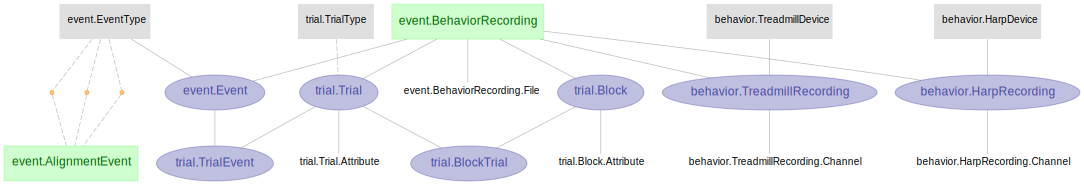

In [7]:
dj.Diagram(behavior)+dj.Diagram(event)+dj.Diagram(trial)

## Automated BPod ingestion

The function is designed ask for a confirmation before entered into the schema.

In [8]:
session.Session()

session_id,subject PyRat import uses this for earmark value,session_datetime
sess9FB2LN5C,WEZ-8701,2022-03-18 00:00:00
sess9FI8ETDQ,ROS-1518,2023-05-25 00:00:00
sess9FJ4IJOQ,ROS-1518,2023-07-18 00:00:00


In [9]:
bpod_path = "DB_WEZ-8701_2022-03-18_scan9FB2LN5C_sess9FB2LN5C/scan9FB2LN5C_WEZ-8701_StimArenaMaster_20220318_165447.mat"
root_dirs = dj.config["custom"]["exp_root_data_dir"]
bpod_object = Bpodfile(bpod_path)

bpod_object.ingest('sess9FB2LN5C', 'scan9FB2LN5C')


/datajoint-data/data/tobiasr/DB_WEZ-8701_2022-03-18_scan9FB2LN5C_sess9FB2LN5C/scan9FB2LN5C_DB_WEZ-8701_2027.h5


/home/leonk/anaconda3/envs/datajoint/lib/python3.8/site-packages/pywavesurfer/ws.py:46: RuntimeWarning: You are reading a WaveSurfer file version this module was not tested with: file version 1.0.5, latest version tested: 0.982
  warnings.warn('You are reading a WaveSurfer file version this module was not tested with: '


BPod items to be inserted:
	Subject : WEZ-8701
	Time    : 2022-03-18 16:55:28
	N Trials: 6
	N Events: 23


In [24]:
scansi = "scan9FB2LN5C"
(event.Event & f'scan_id = "{scansi}"')

session_id,scan_id,event_type,event_start_time (second) relative to recording start,event_end_time (second) relative to recording start
sess9FB2LN5C,scan9FB2LN5C,at_port,39.5742,nan
sess9FB2LN5C,scan9FB2LN5C,at_port,45.72,nan
sess9FB2LN5C,scan9FB2LN5C,at_port,97.7857,nan
sess9FB2LN5C,scan9FB2LN5C,at_port,175.701,nan
sess9FB2LN5C,scan9FB2LN5C,at_port,273.0,nan
sess9FB2LN5C,scan9FB2LN5C,at_target,16.9692,nan
sess9FB2LN5C,scan9FB2LN5C,at_target,33.7099,nan
sess9FB2LN5C,scan9FB2LN5C,at_target,76.791,nan
sess9FB2LN5C,scan9FB2LN5C,at_target,150.778,nan
sess9FB2LN5C,scan9FB2LN5C,at_target,290.64,nan


In [25]:
(trial.Trial & f'scan_id = "{scansi}"')

session_id,scan_id,trial_id trial number (1-based indexing),trial_type,trial_start_time (second) relative to recording start,trial_stop_time (second) relative to recording start
sess9FB2LN5C,scan9FB2LN5C,0,VisibleStim,15.7199,46.9692
sess9FB2LN5C,scan9FB2LN5C,1,VisibleStim,32.4353,41.1176
sess9FB2LN5C,scan9FB2LN5C,2,VisibleStim,67.7857,106.791
sess9FB2LN5C,scan9FB2LN5C,3,VisibleStim,145.701,180.778
sess9FB2LN5C,scan9FB2LN5C,4,VisibleStim,243.0,320.64
sess9FB2LN5C,scan9FB2LN5C,5,VisibleStim,297.79,394.802


In [27]:
trial.TrialType()

trial_type,trial_type_description
Moving_Gratings,Stimulus nomenclature: Type; Class; Azimuth; Elevation; Size; Orientation; Spatial Frequency; Temporal Frequency
Size_Tuning,Stimulus nomenclature: Type; Class; Azimuth; Elevation; Size; Orientation; Spatial Frequency; Temporal Frequency
VisibleStim,


In [31]:
(trial.TrialEvent & f'scan_id = "{scansi}"' & "trial_id = 1").fetch(format = "frame", order_by = "event_start_time")

Empty DataFrame
Columns: []
Index: [(sess9FB2LN5C, scan9FB2LN5C, 1, cue, 33.6998), (sess9FB2LN5C, scan9FB2LN5C, 1, at_target, 33.7099), (sess9FB2LN5C, scan9FB2LN5C, 1, at_port, 39.5742), (sess9FB2LN5C, scan9FB2LN5C, 1, reward, 39.6741), (sess9FB2LN5C, scan9FB2LN5C, 1, in_port_2, 40.8487), (sess9FB2LN5C, scan9FB2LN5C, 1, drinking, 41.0177)]

Check that insertion worked:

In [ ]:
trial.TrialEvent & 'trial_id=0'

In [ ]:
trial.

In [ ]:
event.EventType()

We can also interact with bpod objects. For example:

In [ ]:
bpod_object.trial(1).attributes

In [ ]:
bpod_object.trial_data

# Add Harp recording

In [ ]:
from adamacs.pipeline import behavior, event, scan
event_recording = event.BehaviorRecording.fetch('KEY')[0]
behavior.HarpRecording()

In [ ]:
scansi = "scan9FB2LN5C"
scan_key = (scan.Scan & f'scan_id = "{scansi}"').fetch('KEY')[0]

bpod_path_relative = (event.BehaviorRecording.File & scan_key).fetch1("filepath")
harp_paths = list(find_full_path(
    get_experiment_root_data_dir(), bpod_path_relative
).parent.glob("*harp*bin"))

In [ ]:
event.BehaviorRecording.File()

In [ ]:
bpod_path_relative

In [ ]:
bpod_path_relative 

In [ ]:
behavior.HarpRecording.populate()

In [ ]:
behavior.HarpRecording.Channel()